# Incremental Learning 1: Two-Step Incremental Learning

1. Train model (M1) on the complete dataset (D1).
2. Split the complete dataset (D1) into the base dataset (D2) and the update dataset (D3).
3. Train a new model (M2) on D2 and update it using D3.
4. Compare M1 and M2
    1. Evaluation M1 and M2 on the complete dataset D1.
    2. TODO: Compare feature importance vectors for individual data points from M1 and M2 (should be very similar)


In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

from incremental_learning.config import datasets_dir, root_dir
from incremental_learning.job import train, update, evaluate
from incremental_learning.storage import download_dataset

## 1. Train model (M1) on the complete dataset (D1)

In [2]:
dataset_name = 'ccpp'

download_dataset(dataset_name)
D1 = pd.read_csv(datasets_dir / '{}.csv'.format(dataset_name))
D1.drop_duplicates(inplace=True)

## sample 1000 rows just for test purposes!
D1 = D1.sample(100)

job1 = train(dataset_name, D1)

[W] incremental_learning >> File /Users/thomasveasey/ml-cpp/jupyter/data/configs/ccpp.json does not exist.
[W] incremental_learning >> File /Users/thomasveasey/ml-cpp/jupyter/data/datasets/ccpp.csv does not exist.
[I] incremental_learning >> Downloading configs/ccpp.json from the Google storage bucket to /Users/thomasveasey/ml-cpp/jupyter/data/configs/ccpp.json.
[I] incremental_learning >> Retrieving datasets/ccpp.csv from the Google storage bucket to /Users/thomasveasey/ml-cpp/jupyter/data/datasets/ccpp.csv.


session: job_bpskw/var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp2nlvr3q8	command:
/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpkd24a6eu --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp2nlvr3q8 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmptnbxppa0 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp9n5_lnmb; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi;


In [3]:
job1.wait_to_complete()

stderr,output
"/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpkd24a6eu --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp2nlvr3q8 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmptnbxppa0 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp9n5_lnmb; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi Thomass-MBP-2:incremental_learning thomasveasey$ /Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpkd24a6eu --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp2nlvr3q8 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmptnbxppa0 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp9n5_lnmb; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-31 13:38:24,727257 UTC [25101] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 9c6dd776a6306b) Copyright (c) 2021 Elasticsearch BV 2021-08-31 13:38:24,732526 UTC [25101] DEBUG /Users/thomasveasey/ml-cpp/lib/seccomp/CSystemCallFilter_MacOSX.cc@107 macOS sandbox initialized 2021-08-31 13:38:24,733229 UTC [25101] DEBUG /Users/thomasveasey/ml-cpp/lib/api/CDataFrameAnalyzer.cc@107 Received 100 rows 2021-08-31 13:38:25,619020 UTC [25101] INFO /Users/thomasveasey/ml-cpp/lib/maths/CBoostedTreeImpl.cc@283 Exiting hyperparameter optimisation loop on round 7 out of 18. 2021-08-31 13:38:25,776494 UTC [25101] INFO /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":6032220} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":483183} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":889} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":20} ] 2021-08-31 13:38:25,776544 UTC [25101] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@265 ML data frame analyzer exiting Success Thomass-MBP-2:incremental_learning thomasveasey$",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":478.9359130859375 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":478.4656982421875 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":477.7964782714844 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.7346496582031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.1666870117187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":472.1876220703125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":469.7806091308594 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


28.319660186767578

## 2. Split the complete dataset (D1) into the base dataset (D2) and the update dataset (D3).

In [4]:
D2, D3 = train_test_split(D1, test_size=0.2)

## 3. Train a new model (M2) on D2 and update it using D3.

In [5]:
job2 = train(dataset_name, D2)

session: job_xunwk/var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqchqiir7	command:
/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp6xhw3gy3 --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqchqiir7 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpi9gvce49 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp1purnw7e; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi;


In [6]:
job2.wait_to_complete()

stderr,output
"/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp6xhw3gy3 --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqchqiir7 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpi9gvce49 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp1purnw7e; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi Thomass-MBP-2:incremental_learning thomasveasey$ /Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp6xhw3gy3 --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqchqiir7 --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpi9gvce49 --validElasticLicenseKeyConfirmed true --persist /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp1purnw7e; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-31 13:38:59,260807 UTC [25367] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 9c6dd776a6306b) Copyright (c) 2021 Elasticsearch BV 2021-08-31 13:38:59,265551 UTC [25367] DEBUG /Users/thomasveasey/ml-cpp/lib/seccomp/CSystemCallFilter_MacOSX.cc@107 macOS sandbox initialized 2021-08-31 13:38:59,266180 UTC [25367] DEBUG /Users/thomasveasey/ml-cpp/lib/api/CDataFrameAnalyzer.cc@107 Received 80 rows 2021-08-31 13:39:01,172010 UTC [25367] INFO /Users/thomasveasey/ml-cpp/lib/maths/CBoostedTreeImpl.cc@283 Exiting hyperparameter optimisation loop on round 7 out of 18. 2021-08-31 13:39:01,349076 UTC [25367] INFO /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":5432958} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":492623} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":1932} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":172} ] 2021-08-31 13:39:01,349120 UTC [25367] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@265 ML data frame analyzer exiting Success Thomass-MBP-2:incremental_learning thomasveasey$",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":437.1145324707031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.0045776367187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.6131591796875 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":441.7341918945312 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":437.3771362304687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":458.0837097167969 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":444.513427734375, ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


6.156814813613892

In [7]:
job3 = update(dataset_name, D3, job2)
job3.wait_to_complete()

stderr,output
"/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpfgip06p5 --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpz2sje6mg --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmphp72t500 --validElasticLicenseKeyConfirmed true --restore /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpnlkekgi5; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi Thomass-MBP-2:incremental_learning thomasveasey$ /Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpfgip06p5 --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpz2sje6mg --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmphp72t500 --validElasticLicenseKeyConfirmed true --restore /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpnlkekgi5; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-31 13:39:05,588796 UTC [25643] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 9c6dd776a6306b) Copyright (c) 2021 Elasticsearch BV 2021-08-31 13:39:05,593355 UTC [25643] DEBUG /Users/thomasveasey/ml-cpp/lib/seccomp/CSystemCallFilter_MacOSX.cc@107 macOS sandbox initialized 2021-08-31 13:39:05,602088 UTC [25643] DEBUG /Users/thomasveasey/ml-cpp/lib/api/CDataFrameAnalyzer.cc@107 Received 28 rows 2021-08-31 13:39:05,627868 UTC [25643] INFO /Users/thomasveasey/ml-cpp/lib/maths/CBoostedTreeImpl.cc@436 Exiting hyperparameter optimisation loop early 2021-08-31 13:39:05,649485 UTC [25643] INFO /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":2943511} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":273509} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":27} ] 2021-08-31 13:39:05,649524 UTC [25643] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@265 ML data frame analyzer exiting Success Thomass-MBP-2:incremental_learning thomasveasey$",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":485.1379089355469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":486.4248352050781 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":455.6815490722656 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":476.7702331542969 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":435.7314758300781 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":437.3088684082031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.1652221679687 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


5.224149942398071

## 4. A. Compare M1 and M2 on D1

In [8]:
y_true = D1[job1.dependent_variable]
y_M1 = job1.get_predictions()
eval_job = evaluate(dataset_name, D1, job2)
success = eval_job.wait_to_complete()
if not success:
    print('Evaluation failed')
y_M2 = eval_job.get_predictions()

stderr,output
"/Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqs7f11sl --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpxih2xaqt --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp9y2wgg22 --validElasticLicenseKeyConfirmed true --restore /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp0ghyvmim; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi Thomass-MBP-2:incremental_learning thomasveasey$ /Users/thomasveasey/ml-cpp/build/distribution/platform/darwin-x86_64/controller.app/Contents/MacOS/data_frame_analyzer --input /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpqs7f11sl --config /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmpxih2xaqt --output /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp9y2wgg22 --validElasticLicenseKeyConfirmed true --restore /var/folders/xn/wrmsjpr53z9g9pqrrz12p2t80000gn/T/tmp0ghyvmim; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-08-31 13:39:10,703541 UTC [25924] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@152 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 9c6dd776a6306b) Copyright (c) 2021 Elasticsearch BV 2021-08-31 13:39:10,708268 UTC [25924] DEBUG /Users/thomasveasey/ml-cpp/lib/seccomp/CSystemCallFilter_MacOSX.cc@107 macOS sandbox initialized 2021-08-31 13:39:10,717582 UTC [25924] DEBUG /Users/thomasveasey/ml-cpp/lib/api/CDataFrameAnalyzer.cc@107 Received 108 rows 2021-08-31 13:39:10,728664 UTC [25924] INFO /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@260 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":6271925} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":147322} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":1} ] 2021-08-31 13:39:10,728727 UTC [25924] DEBUG /Users/thomasveasey/ml-cpp/bin/data_frame_analyzer/Main.cc@265 ML data frame analyzer exiting Success Thomass-MBP-2:incremental_learning thomasveasey$",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":481.5670166015625 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":478.2450866699219 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":476.0826721191406 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.9826354980469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.3504028320312 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":472.7062683105469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":470.78759765625,"" ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[],""train_pr ,{""compressed_data_summarization"":{""doc_num"":0,""data_summarization"":""H4sIAAAAAAA ]"


Job succeeded


In [9]:
def compute_metrics(ytrue, m1pred, m2pred):
    m1_mae = mean_absolute_error(ytrue, m1pred)
    m1_mse = mean_squared_error(ytrue, m1pred)
    m2_mae = mean_absolute_error(ytrue, m2pred)
    m2_mse = mean_squared_error(ytrue, m2pred)
    print("M1: MAE: {}\tMSE:{}".format(m1_mae, m1_mse))
    print("M2: MAE: {}\tMSE:{}".format(m2_mae, m2_mse))
    ax = sns.scatterplot(x=m1pred, y=m2pred)
    plt.xlabel('M1 predictions')
    plt.ylabel('M2 predictions')

M1: MAE: 2.4216355712890616	MSE:9.561144354262385
M2: MAE: 2.1746685058593744	MSE:8.45023400826621


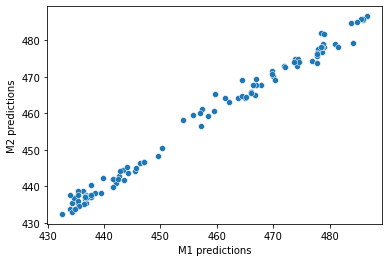

In [10]:
compute_metrics(y_true, y_M1, y_M2)